In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
tf.__version__

'2.6.0'

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [34]:
idg = ImageDataGenerator(rotation_range=10)

In [35]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [36]:
y_train_hot = to_categorical(y_train, num_classes=10)
y_test_hot = to_categorical(y_test, num_classes=10)

In [41]:
gen = idg.flow(x_train.reshape([-1, 28, 28, 1]), y_train_hot, batch_size=500)

In [42]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, MaxPooling2D

In [44]:
in_layer = Input(shape=[28, 28, 1])
c1 = Conv2D(16, 3, activation="relu")(in_layer)
m1 = MaxPooling2D(2)(c1)
c2 = Conv2D(32, 3, activation="relu")(m1)
m2 = MaxPooling2D(2)(c2)
flat = Flatten()(m2)
d1 = Dense(500, activation="relu")(flat)
d2 = Dense(200, activation="relu")(d1)
d3 = Dense(50, activation="relu")(d2)
out_layer = Dense(10, activation="softmax")(d3)

In [45]:
model = Model(in_layer, out_layer)

In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               4005

In [47]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
model.fit_generator(gen, steps_per_epoch=50, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 13s 252ms/step - loss: 2.4501 - accuracy: 0.6190
Epoch 2/10
50/50 [==============================] - 13s 251ms/step - loss: 0.2635 - accuracy: 0.9209
Epoch 3/10
50/50 [==============================] - 13s 251ms/step - loss: 0.1665 - accuracy: 0.9502
Epoch 4/10
50/50 [==============================] - 13s 250ms/step - loss: 0.1248 - accuracy: 0.9631
Epoch 5/10
50/50 [==============================] - 13s 251ms/step - loss: 0.0977 - accuracy: 0.9705
Epoch 6/10
50/50 [==============================] - 13s 250ms/step - loss: 0.0938 - accuracy: 0.9714
Epoch 7/10
50/50 [==============================] - 13s 250ms/step - loss: 0.0788 - accuracy: 0.9758
Epoch 8/10
50/50 [==============================] - 13s 250ms/step - loss: 0.0610 - accuracy: 0.9817
Epoch 9/10
50/50 [==============================] - 13s 250ms/step - loss: 0.0559 - accuracy: 0.9831
Epoch 10/10
50/50 [==============================] - 13s 249ms/step - loss: 0.0582 - accura

In [49]:
model.evaluate(x_test, y_test_hot, verbose=0)

[0.06236114352941513, 0.9805999994277954]

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




[5]


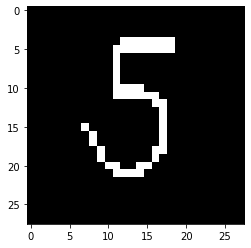

In [56]:
img = cv2.imread("five.png")
small = cv2.resize(img, (28, 28))
gray = small.mean(axis=2)

gray = (gray > 100).astype(int) * 255

output = model.predict(np.array([gray]))

print(output.argmax(axis=1))

plt.imshow(gray, cmap="gray")